# `matplotlib` visualisation

In this tutorial, we give an overview of how objects from `discretisedfield` can be visualised using matplotlib, as well as, how the plots can be configured.

As an example, we are going to use the following field:

In [1]:
import discretisedfield as df
import matplotlib.pyplot as plt

region = df.Region(p1=(-10e-9, -10e-9, -10e-9), p2=(15e-9, 10e-9, 5e-9))
mesh = df.Mesh(region=region,
               cell=(1e-9, 1e-9, 1e-9),
               subregions={'r1': df.Region(p1=(-10e-9, -10e-9, -10e-9), p2=(0, 10e-9, 5e-9)),
                           'r2': df.Region(p1=(0e-9, -10e-9, -10e-9), p2=(15e-9, 10e-9, 5e-9))})

def value_fun(point):
    x, y, z = point
    c = 1e9
    if x < -5e-9:    
        return (0, y*c, z*c)
    else:
        return (x*c, y*c, z*c)

field = df.Field(mesh, dim=3, value=value_fun, norm=1e6)

## Scalar field visualisation

Before we can plot the field using `matplotlib`, we have to define the plane we want to plot.

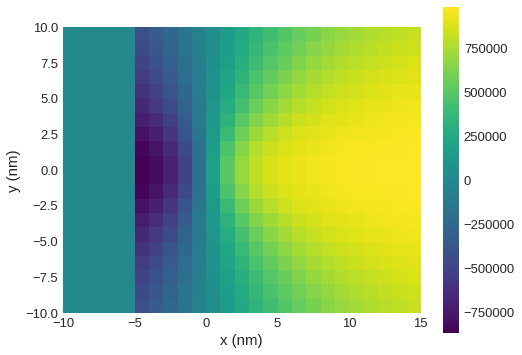

In [2]:
field.x.plane('z').mpl_scalar()

In order to remove the cells where field is zero from the plot, `filter_field` must be passed:

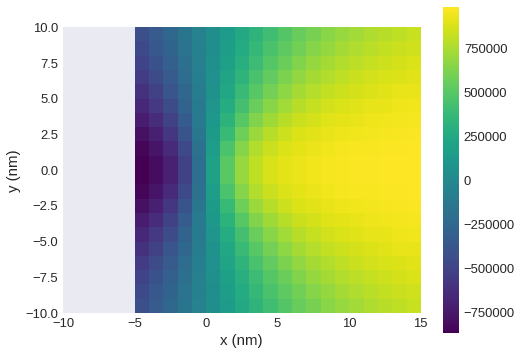

In [3]:
field.x.plane('z').mpl_scalar(filter_field=field.x)

Colorbar is added to the plot by default. However, we can remove it from the plot:

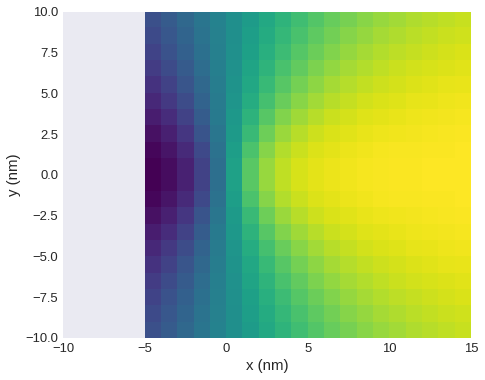

In [4]:
field.x.plane('z').mpl_scalar(filter_field=field.x, colorbar=False)

Similarly, we can change the colorbar label:

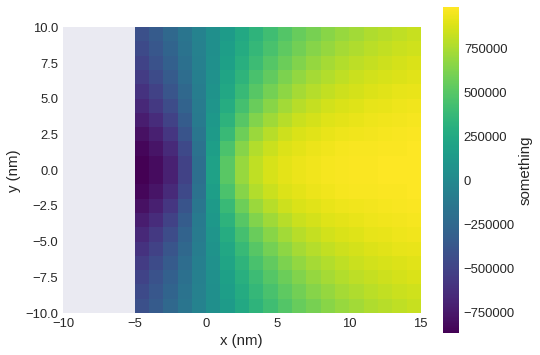

In [5]:
field.x.plane('z').mpl_scalar(filter_field=field.x, colorbar_label='something')

We can change the size of the plot:

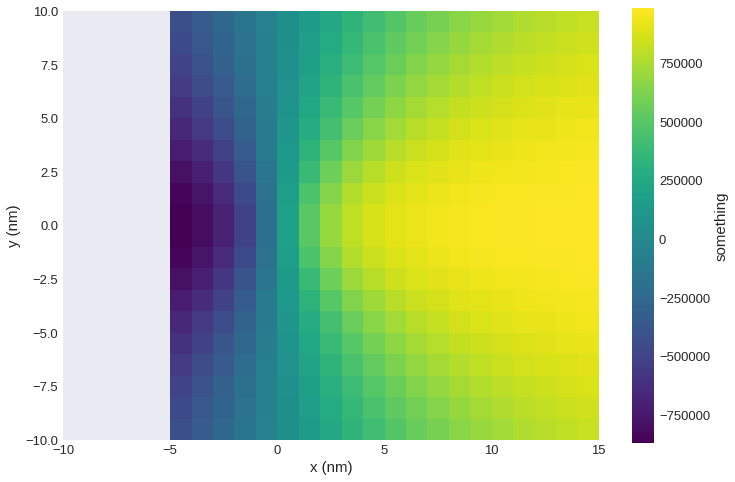

In [6]:
field.x.plane('z').mpl_scalar(figsize=(12, 8), filter_field=field.x, colorbar_label='something')

Sometimes it is necessary to adjust the limits on the colorbar:

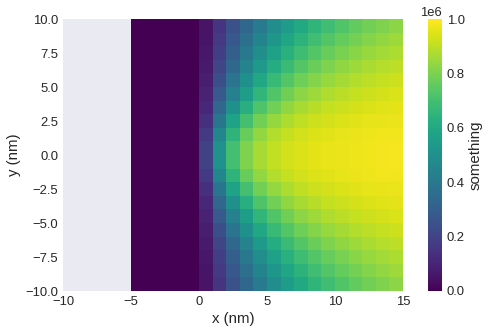

In [7]:
field.x.plane('z').mpl_scalar(figsize=(9, 5), filter_field=field.x, colorbar_label='something', clim=(0, 1e6))

Multiplier is computed internally, but it can be explicitly changed using `multiplier`:

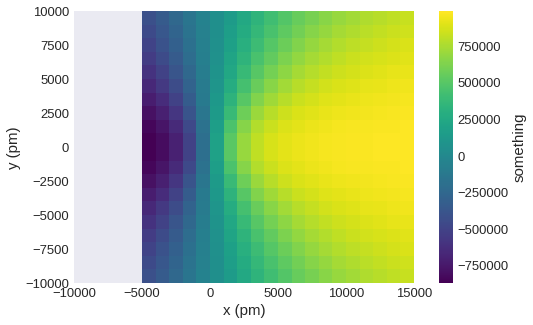

In [8]:
field.x.plane('z').mpl_scalar(figsize=(9, 5), filter_field=field.x, colorbar_label='something', multiplier=1e-12)

In order to save the plot, we pass `filename` and the plot is saved as PDF.

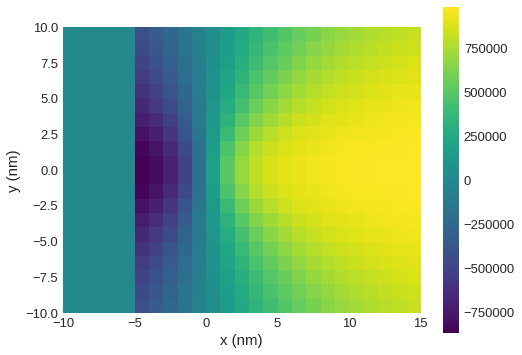

In [9]:
field.x.plane('z').mpl_scalar(filename='scalar.pdf')

`mpl_scalar` is based on `matplotlib.imshow`, so any argument accepted by it can be passed:

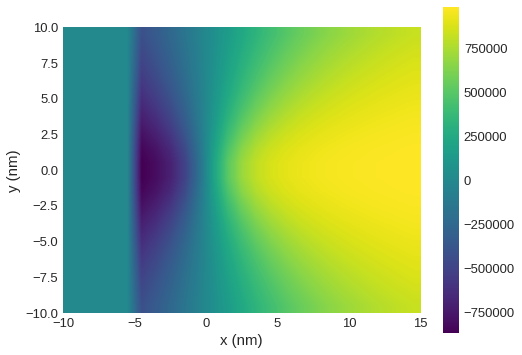

In [10]:
field.x.plane('z').mpl_scalar(interpolation='bilinear')

The way we can change the axes, we address at the end of this tutorial.

## Vector field visualisation

Default plot is:

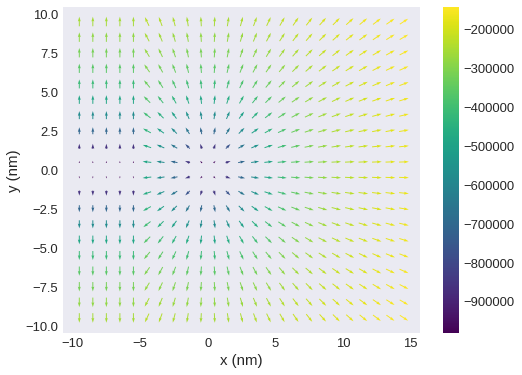

In [11]:
field.plane('z').mpl_vector()

Reduce the number of vectors.

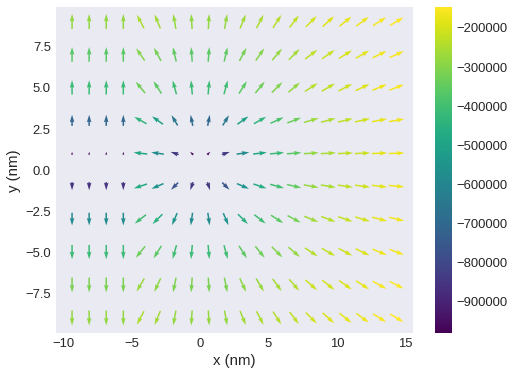

In [12]:
field.plane('z', n=(20, 10)).mpl_vector()

Turn off color

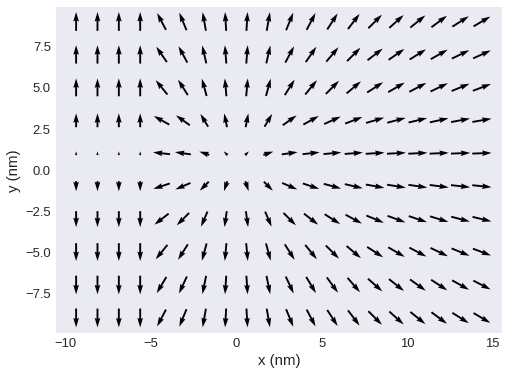

In [13]:
field.plane('z', n=(20, 10)).mpl_vector(color=False)

Use different color field.

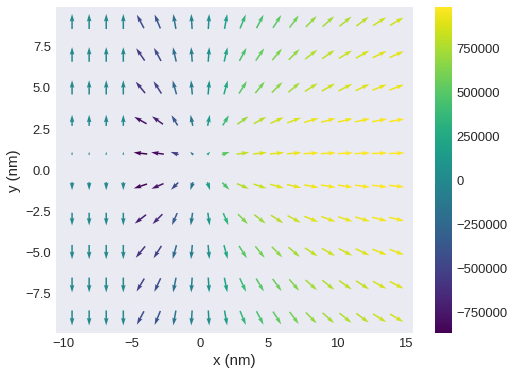

In [14]:
field.plane('z', n=(20, 10)).mpl_vector(color_field=field.x, colorbar=True)

Turn off colorbar

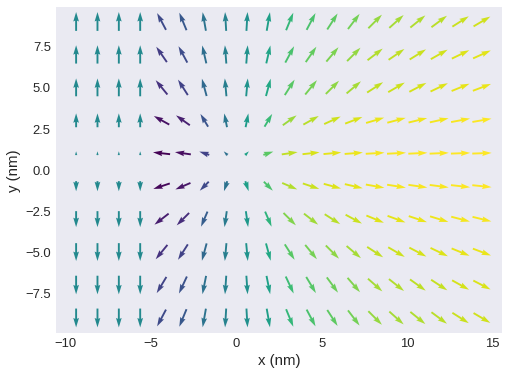

In [15]:
field.plane('z', n=(20, 10)).mpl_vector(color_field=field.x, colorbar=False)

Add colorbar label

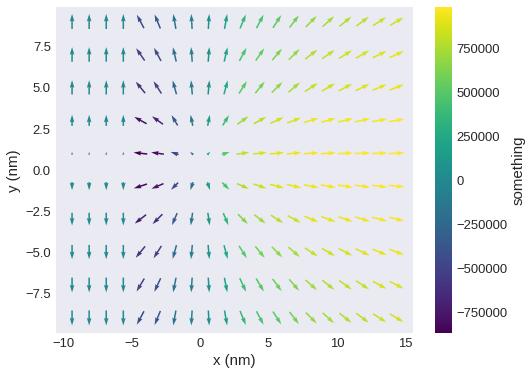

In [16]:
field.plane('z', n=(20, 10)).mpl_vector(color_field=field.x, colorbar_label='something')

Colormap

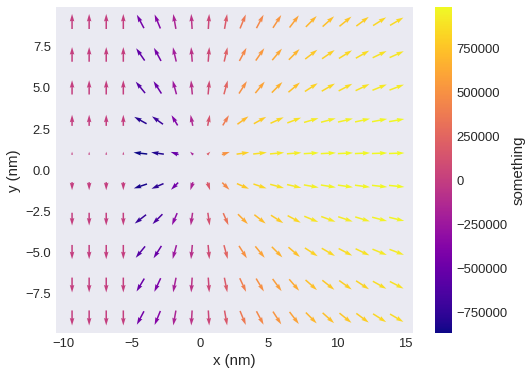

In [17]:
field.plane('z', n=(20, 10)).mpl_vector(color_field=field.x, colorbar_label='something', cmap='plasma')

Colormap limit

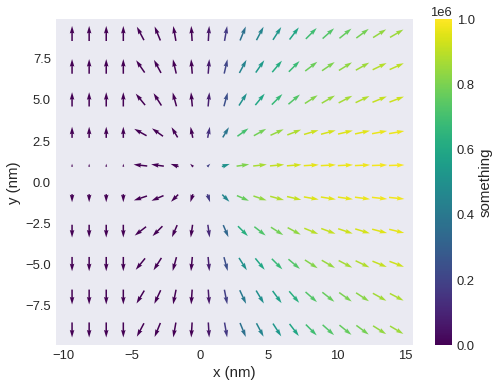

In [18]:
field.plane('z', n=(20, 10)).mpl_vector(color_field=field.x, colorbar_label='something', clim=(0, 1e6))

Multiplier

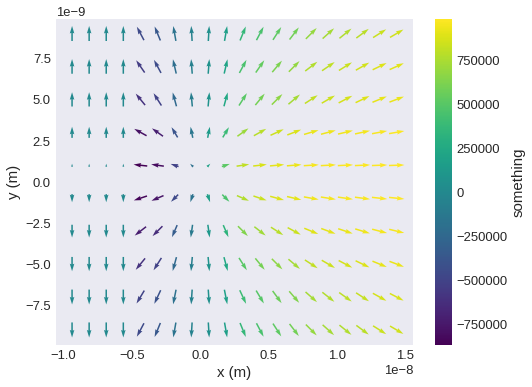

In [19]:
field.plane('z', n=(20, 10)).mpl_vector(color_field=field.x, colorbar_label='something', multiplier=1)

Figsize

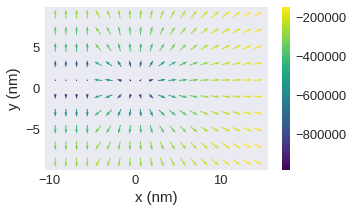

In [20]:
field.plane('z', n=(20, 10)).mpl_vector(figsize=(5, 3))

Saving plot

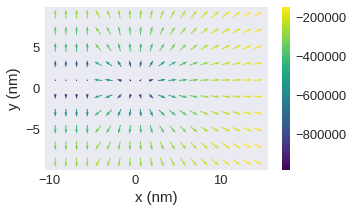

In [21]:
field.plane('z', n=(20, 10)).mpl_vector(figsize=(5, 3), filename='vector.pdf')

Quiver argument

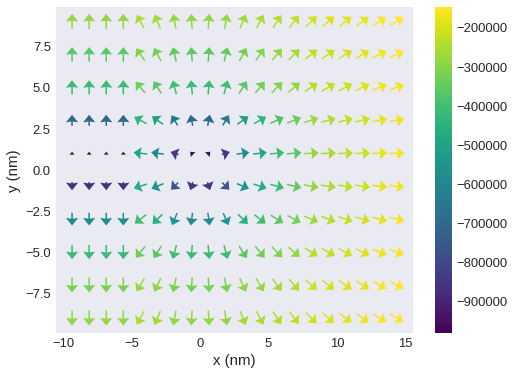

In [22]:
field.plane('z', n=(20, 10)).mpl_vector(headwidth=8)

Scale

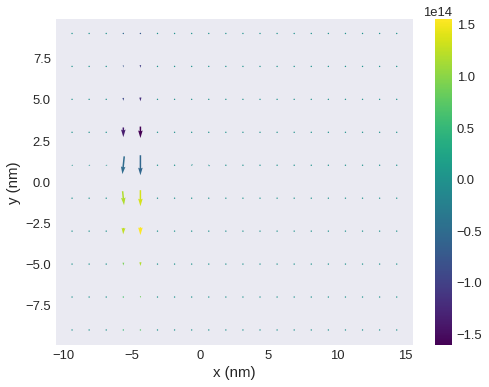

In [23]:
field.curl.plane('z', n=(20, 10)).mpl_vector(scale=5e15)

## `mpl`

`mpl` is a convenience function which allows simple building of plots:

Default behaviour is:

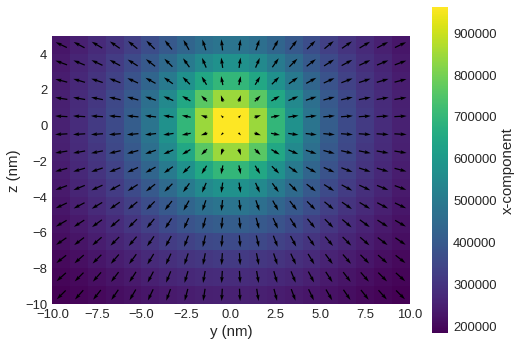

In [24]:
field.plane('x').mpl()

Changing figsize to fit colorbar

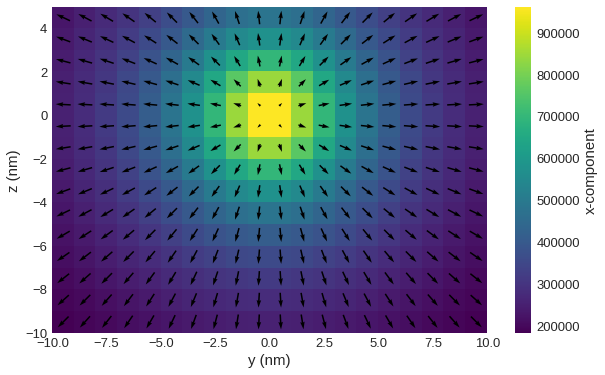

In [25]:
field.plane('x').mpl(figsize=(10, 6))

Change scalar field

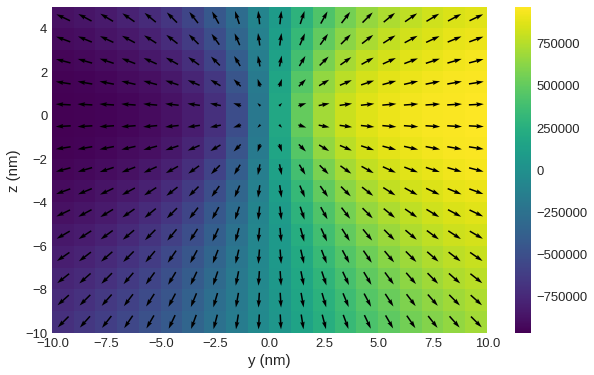

In [26]:
field.plane('x').mpl(figsize=(10, 6), scalar_field=field.y)

Turn off colorbar

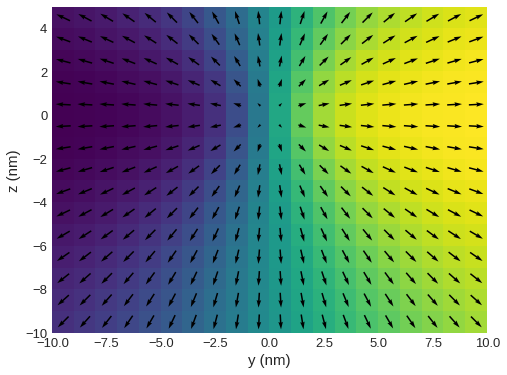

In [27]:
field.plane('x').mpl(figsize=(10, 6), scalar_field=field.y, scalar_colorbar=False)

Add scalar colorbar label

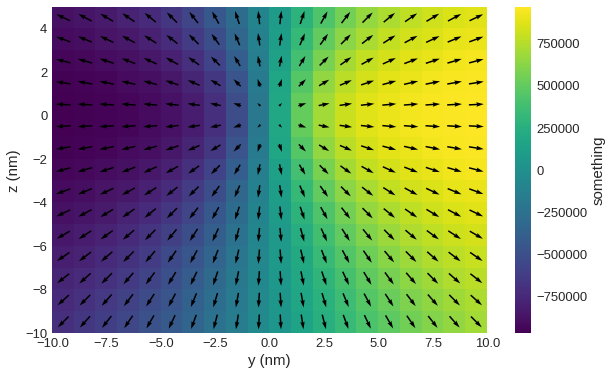

In [28]:
field.plane('x').mpl(figsize=(10, 6), scalar_field=field.y, scalar_colorbar_label='something')

Add filter field

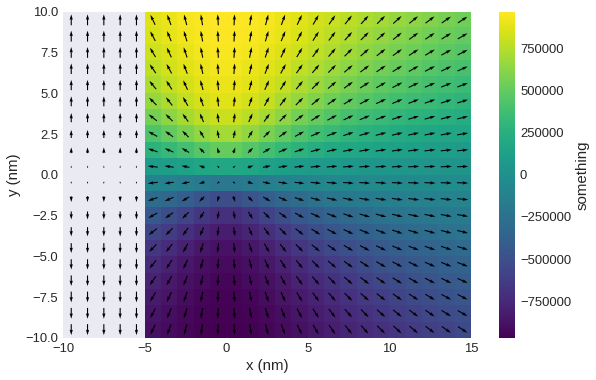

In [29]:
field.plane('z').mpl(figsize=(10, 6), scalar_filter_field=field.x, scalar_field=field.y,
                     scalar_colorbar_label='something')

Scalar colormap

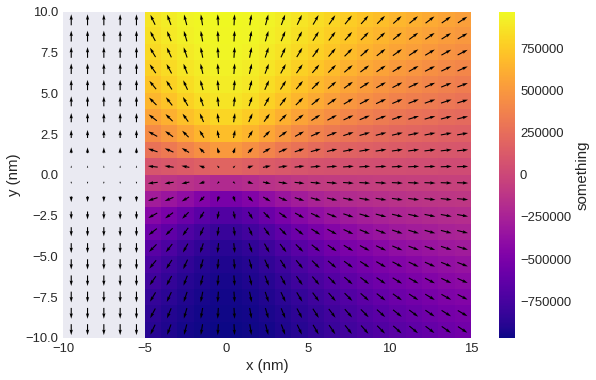

In [30]:
field.plane('z').mpl(figsize=(10, 6), scalar_filter_field=field.x, scalar_field=field.y,
                     scalar_colorbar_label='something',
                     scalar_cmap='plasma')

Colorbar limit:

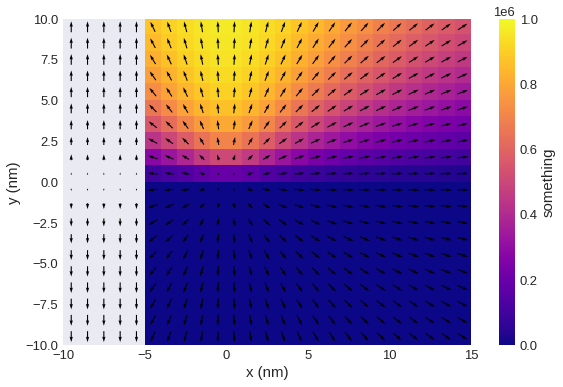

In [31]:
field.plane('z').mpl(figsize=(10, 6), scalar_filter_field=field.x, scalar_field=field.y, scalar_colorbar_label='something',
                     scalar_cmap='plasma', scalar_clim=(0, 1e6))

Vector field

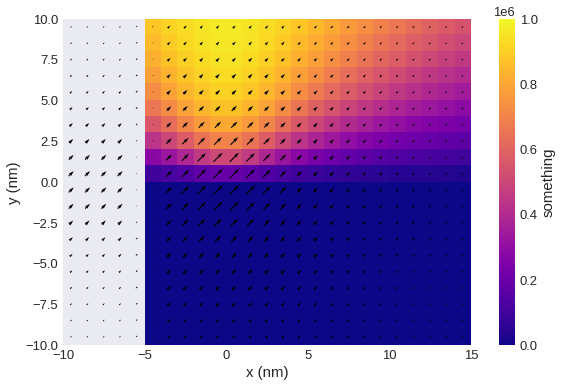

In [32]:
field.plane('z').mpl(figsize=(10, 6), scalar_filter_field=field.x,
                     scalar_field=field.y,
                     scalar_colorbar_label='something',
                     scalar_cmap='plasma',
                     scalar_clim=(0, 1e6),
                     vector_field=field.div,
                     vector_scale=3e16)

Color vector field:

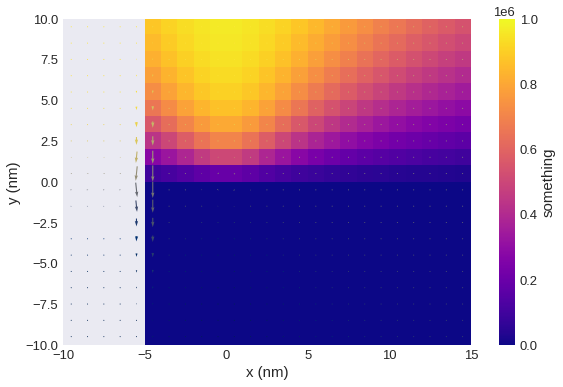

In [33]:
field.plane('z').mpl(figsize=(10, 6), scalar_filter_field=field.x, scalar_field=field.y, scalar_colorbar_label='something',
                     scalar_cmap='plasma', scalar_clim=(0, 1e6), vector_field=field.curl,
                     vector_color_field=field.y, vector_color=True, vector_scale=7e15)

Add vector colorbar

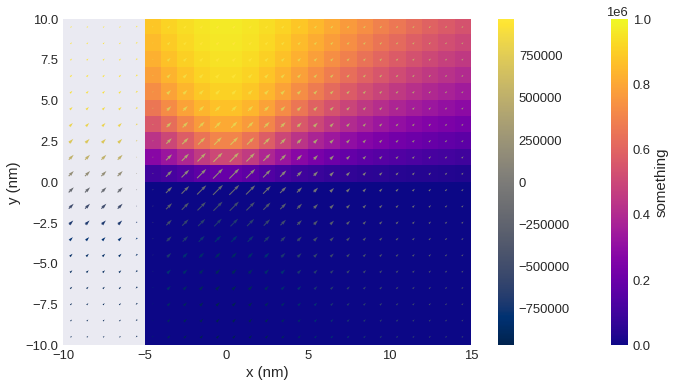

In [34]:
field.plane('z').mpl(figsize=(12, 6), scalar_filter_field=field.x, scalar_field=field.y, scalar_colorbar_label='something',
                     scalar_cmap='plasma', scalar_clim=(0, 1e6), vector_field=field.div, vector_color_field=field.y, vector_color=True,
                     vector_colorbar=True, vector_scale=3e16)

Label vector colorbar

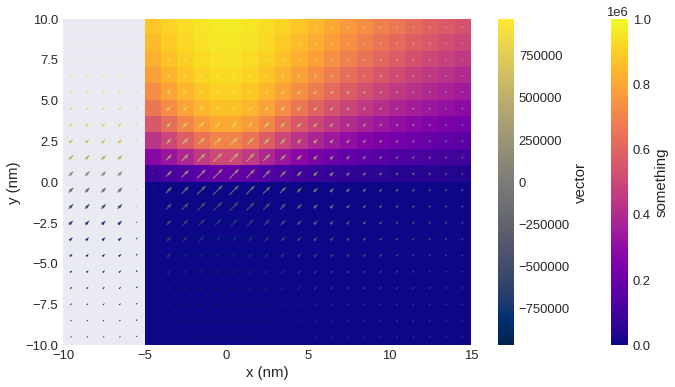

In [35]:
field.plane('z').mpl(figsize=(12, 6), scalar_filter_field=field.x, scalar_field=field.y, scalar_colorbar_label='something',
                     scalar_cmap='plasma', scalar_clim=(0, 1e6), vector_field=field.div, vector_color_field=field.y,
                     vector_color=True, vector_colorbar=True, vector_colorbar_label='vector', vector_scale=3e16)

Vector cmap

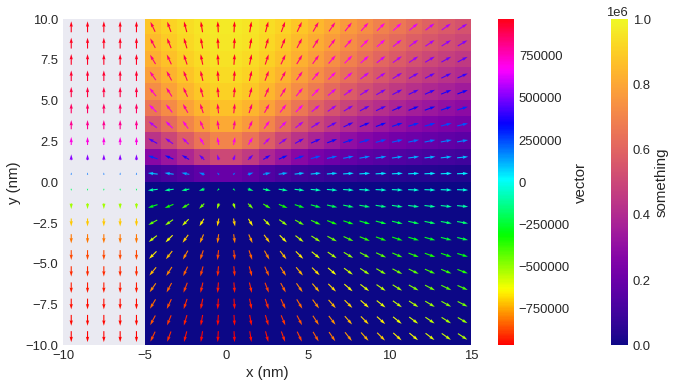

In [36]:
field.plane('z').mpl(figsize=(12, 6), scalar_filter_field=field.x, scalar_field=field.y, scalar_colorbar_label='something',
                     scalar_cmap='plasma', scalar_clim=(0, 1e6), vector_field=field, vector_color_field=field.y, vector_color=True,
                     vector_colorbar=True, vector_colorbar_label='vector', vector_cmap='hsv')

Vector clim

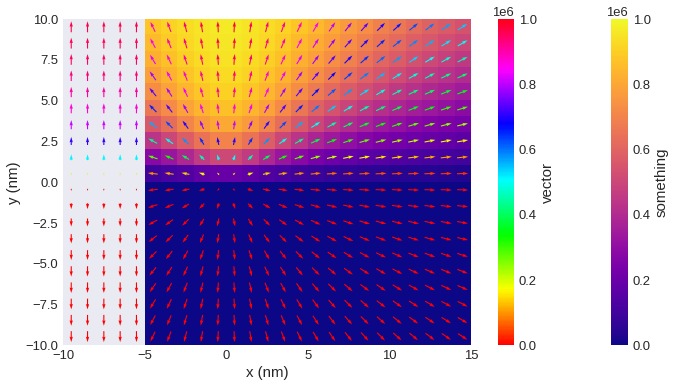

In [37]:
field.plane('z').mpl(figsize=(12, 6), scalar_filter_field=field.x, scalar_field=field.y, scalar_colorbar_label='something',
                     scalar_cmap='plasma', scalar_clim=(0, 1e6), vector_field=field, vector_color_field=field.y, vector_color=True,
                     vector_colorbar=True, vector_colorbar_label='vector', vector_cmap='hsv', vector_clim=(0, 1e6))

Multiplier

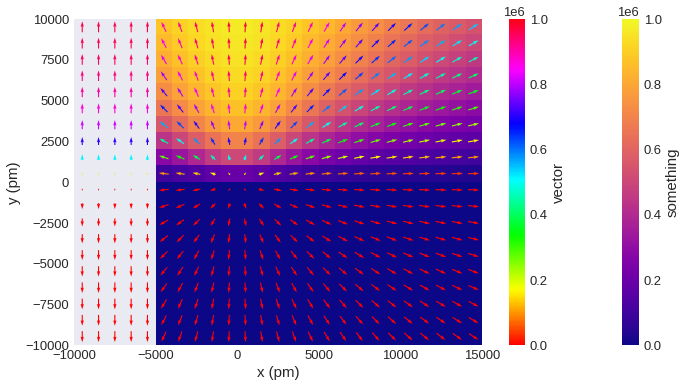

In [38]:
field.plane('z').mpl(figsize=(12, 6), scalar_filter_field=field.x, scalar_field=field.y, scalar_colorbar_label='something',
                     scalar_cmap='plasma', scalar_clim=(0, 1e6), vector_field=field, vector_color_field=field.y, vector_color=True,
                     vector_colorbar=True, vector_colorbar_label='vector', vector_cmap='hsv', vector_clim=(0, 1e6),
                     multiplier=1e-12)

Save plot

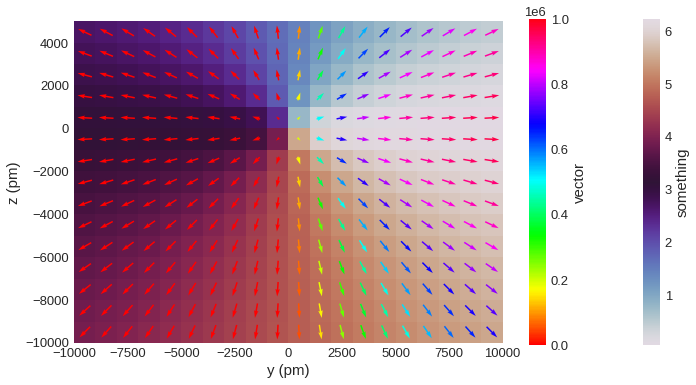

In [39]:
field.plane('x').mpl(figsize=(12, 6), scalar_field=field.plane('x').angle, scalar_colorbar_label='something',
                     scalar_cmap='twilight', vector_field=field, vector_color_field=field.y, vector_color=True,
                     vector_colorbar=True, vector_colorbar_label='vector', vector_cmap='hsv', vector_clim=(0, 1e6),
                     multiplier=1e-12, filename='mpl.pdf')

## Exposing axes

In order to change the axes on which the plot is added, we have to expose them:

Text(0.5, 1.0, 'My cool plot')

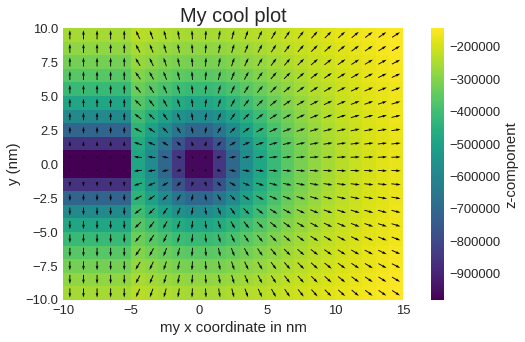

In [40]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

field.plane('z').mpl(ax=ax)

ax.set_xlabel('my x coordinate in nm')
ax.set_title('My cool plot')